In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

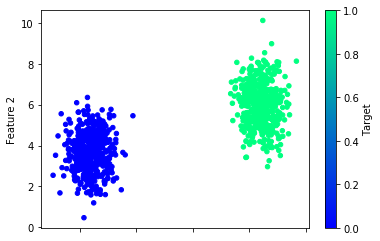

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.5154 - accuracy: 0.9747
Epoch 2/100
750/750 [==============================] - 0s 65us/sample - loss: 0.5028 - accuracy: 0.9947
Epoch 3/100
750/750 [==============================] - 0s 65us/sample - loss: 0.4902 - accuracy: 0.9947
Epoch 4/100
750/750 [==============================] - 0s 63us/sample - loss: 0.4776 - accuracy: 0.9947
Epoch 5/100
750/750 [==============================] - 0s 64us/sample - loss: 0.4652 - accuracy: 0.9947
Epoch 6/100
750/750 [==============================] - 0s 65us/sample - loss: 0.4530 - accuracy: 0.9947
Epoch 7/100
750/750 [==============================] - 0s 66us/sample - loss: 0.4409 - accuracy: 0.9947
Epoch 8/100
750/750 [==============================] - 0s 65us/sample - loss: 0.4291 - accuracy: 0.9947
Epoch 9/100
750/750 [==============================] - 0s 66us/sample - loss: 0.4176 - accuracy: 0.9947
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 70us/sample - loss: 0.0982 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 66us/sample - loss: 0.0966 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 63us/sample - loss: 0.0951 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 64us/sample - loss: 0.0935 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 65us/sample - loss: 0.0920 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 65us/sample - loss: 0.0906 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 64us/sample - loss: 0.0891 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 64us/sample - loss: 0.0877 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 63us/sample - loss: 0.0864 - accuracy: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 63us/samp

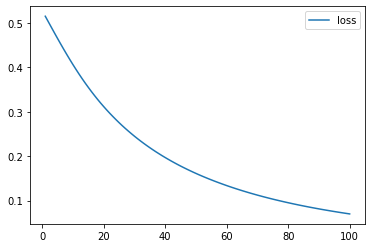

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

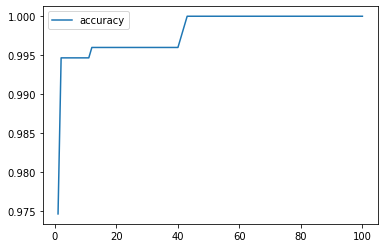

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.0613 - accuracy: 1.0000
Loss: 0.07102753686904907, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

nn_model.predict_classes(new_X)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

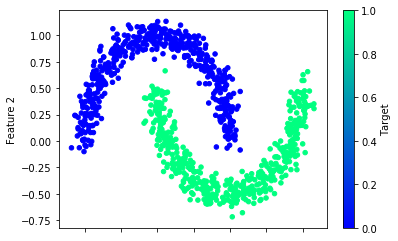

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 123us/sample - loss: 1.1988 - accuracy: 0.4493
Epoch 2/100
750/750 [==============================] - 0s 64us/sample - loss: 1.0651 - accuracy: 0.4787
Epoch 3/100
750/750 [==============================] - 0s 66us/sample - loss: 0.9777 - accuracy: 0.4880
Epoch 4/100
750/750 [==============================] - 0s 63us/sample - loss: 0.9160 - accuracy: 0.5040
Epoch 5/100
750/750 [==============================] - 0s 65us/sample - loss: 0.8705 - accuracy: 0.5200
Epoch 6/100
750/750 [==============================] - 0s 62us/sample - loss: 0.8354 - accuracy: 0.5293
Epoch 7/100
750/750 [==============================] - 0s 67us/sample - loss: 0.8059 - accuracy: 0.5427
Epoch 8/100
750/750 [==============================] - 0s 64us/sample - loss: 0.7810 - accuracy: 0.5547
Epoch 9/100
750/750 [==============================] - 0s 65us/sample - loss: 0.7586 - accuracy: 0.5693
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 70us/sample - loss: 0.3059 - accuracy: 0.8653
Epoch 79/100
750/750 [==============================] - 0s 66us/sample - loss: 0.3043 - accuracy: 0.8653
Epoch 80/100
750/750 [==============================] - 0s 64us/sample - loss: 0.3026 - accuracy: 0.8667
Epoch 81/100
750/750 [==============================] - 0s 63us/sample - loss: 0.3011 - accuracy: 0.8693
Epoch 82/100
750/750 [==============================] - 0s 64us/sample - loss: 0.2996 - accuracy: 0.8693
Epoch 83/100
750/750 [==============================] - 0s 63us/sample - loss: 0.2983 - accuracy: 0.8693
Epoch 84/100
750/750 [==============================] - 0s 64us/sample - loss: 0.2968 - accuracy: 0.8693
Epoch 85/100
750/750 [==============================] - 0s 62us/sample - loss: 0.2955 - accuracy: 0.8693
Epoch 86/100
750/750 [==============================] - 0s 63us/sample - loss: 0.2942 - accuracy: 0.8707
Epoch 87/100
750/750 [==============================] - 0s 66us/samp

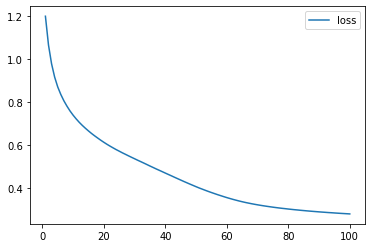

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

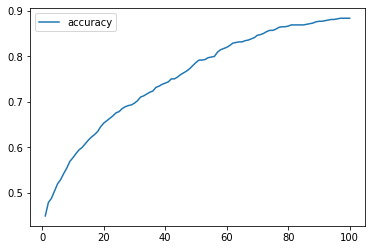

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [21]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.7551 - accuracy: 0.4013
Epoch 2/100
750/750 [==============================] - 0s 67us/sample - loss: 0.7023 - accuracy: 0.6480
Epoch 3/100
750/750 [==============================] - 0s 67us/sample - loss: 0.6586 - accuracy: 0.6840
Epoch 4/100
750/750 [==============================] - 0s 67us/sample - loss: 0.6233 - accuracy: 0.7027
Epoch 5/100
750/750 [==============================] - 0s 68us/sample - loss: 0.5928 - accuracy: 0.7173
Epoch 6/100
750/750 [==============================] - 0s 65us/sample - loss: 0.5683 - accuracy: 0.7333
Epoch 7/100
750/750 [==============================] - 0s 66us/sample - loss: 0.5465 - accuracy: 0.7347
Epoch 8/100
750/750 [==============================] - 0s 68us/sample - loss: 0.5283 - accuracy: 0.7373
Epoch 9/100
750/750 [==============================] - 0s 69us/sample - loss: 0.5126 - accuracy: 0.7440
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 67us/sample - loss: 0.2934 - accuracy: 0.8960
Epoch 79/100
750/750 [==============================] - 0s 66us/sample - loss: 0.2925 - accuracy: 0.8960
Epoch 80/100
750/750 [==============================] - 0s 65us/sample - loss: 0.2916 - accuracy: 0.8973
Epoch 81/100
750/750 [==============================] - 0s 64us/sample - loss: 0.2908 - accuracy: 0.8973
Epoch 82/100
750/750 [==============================] - 0s 64us/sample - loss: 0.2899 - accuracy: 0.8973
Epoch 83/100
750/750 [==============================] - 0s 66us/sample - loss: 0.2891 - accuracy: 0.8973
Epoch 84/100
750/750 [==============================] - 0s 69us/sample - loss: 0.2884 - accuracy: 0.8973
Epoch 85/100
750/750 [==============================] - 0s 69us/sample - loss: 0.2875 - accuracy: 0.8973
Epoch 86/100
750/750 [==============================] - 0s 68us/sample - loss: 0.2867 - accuracy: 0.8973
Epoch 87/100
750/750 [==============================] - 0s 68us/samp

# One hot encoding

In [24]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Hungary            9
Pakistan           9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Holland            4
Poland             4
Fiji               4
Sweden             3
Sarawak            3
Dubai              3
Finland            3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

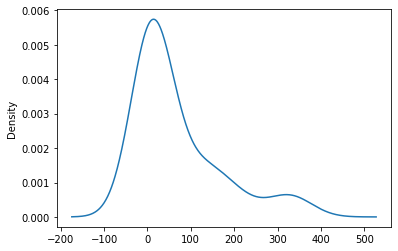

In [25]:
# Visualize the value counts
country_counts.plot.density()

In [26]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [27]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Standardization/Normalization

In [29]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [30]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
scaler.fit(hr_df)

# Scale the data
scaled_data = scaler.transform(hr_df)

In [31]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656
